# ***Covid19 Twitter Sentiment Analysis::***

# <b> Objective </b>

### our aim is to predict the sentiment of COVID-19 tweets using classification models.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv('/content/Coronavirus Tweets.csv', encoding = 'latin-1')

In [7]:
df1=data.copy()

In [8]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/20,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/20,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/20,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/20,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/20,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

For sentiment analysis we only want tweet and sentiment *Features*

In [42]:
df=df1[['OriginalTweet','Sentiment']]

In [43]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [44]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [45]:
df.shape

(41157, 2)

In [46]:
len(df[df.duplicated()])

0

#**Preprocessing**

**Convert to LowerCase :**

In [47]:
df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

**Removing Punctuations :**

In [48]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [49]:
import re
df['OriginalTweet'] = df['OriginalTweet'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)


In [50]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [51]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)


In [52]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [53]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head()

,OriginalTweet,Sentiment,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [54]:
df['clean_tweets'][3]

'my food stock is not the only one which is empty\r\r\n\r\r\nplease dont panic there will be enough food for everyone if you do not take more than you need \r\r\nstay calm stay safe\r\r\n\r\r\ncovid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral '

**Removing Stop Words :**

In [55]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [56]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [57]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [58]:
df.clean_tweets[4]

['ready',
 'go',
 'supermarket',
 'covid19',
 'outbreak',
 'im',
 'paranoid',
 'food',
 'stock',
 'litteraly',
 'empty',
 'coronavirus',
 'serious',
 'thing',
 'please',
 'dont',
 'panic',
 'causes',
 'shortage',
 'coronavirusfrance',
 'restezchezvous',
 'stayathome',
 'confinement']

**Stemming**

In [59]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [60]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [61]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))

In [62]:
#result
df.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid19 outbreak im paran...
Name: stemmed, dtype: object

 **Lemmatizing**

In [63]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [64]:
df.head()

,OriginalTweet,Sentiment,clean_tweets,stemmed,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[food, stock, one, empty, please, dont, panic,..."
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid19, outbreak, im...",readi go supermarket covid19 outbreak im paran...,"[ready, go, supermarket, covid19, outbreak, im..."


### **EDA**

In [65]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

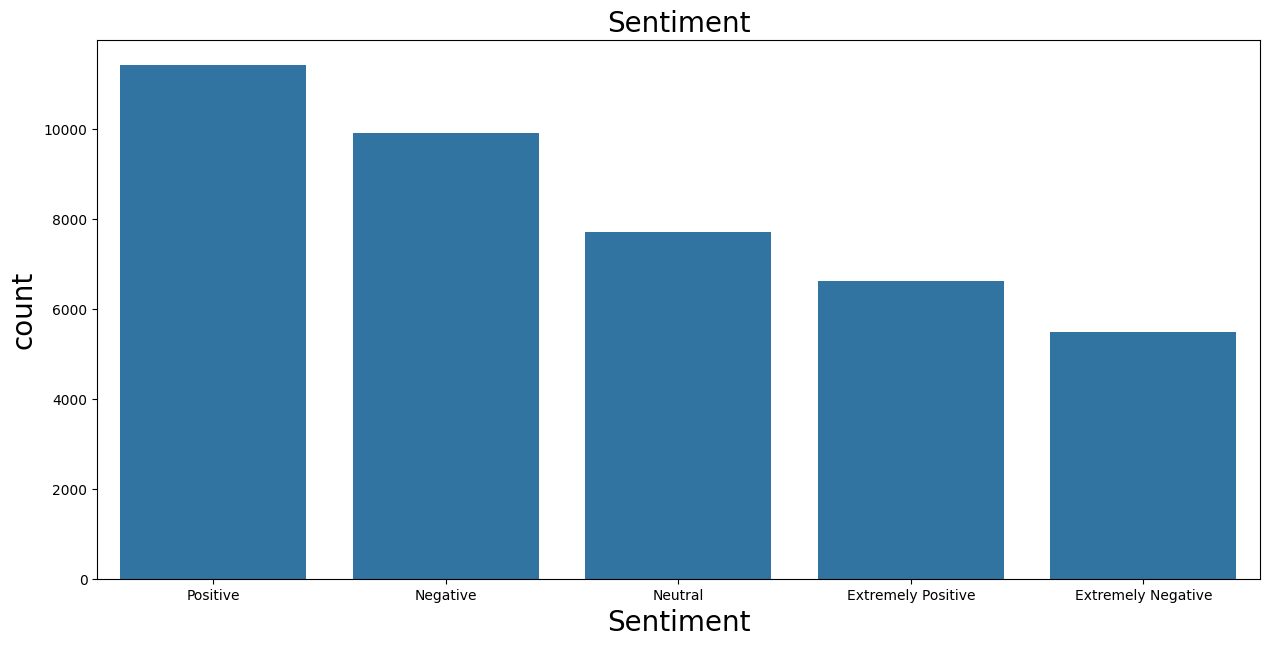

In [67]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)


**Number of "Positive" sentiments are higher**

In [68]:
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [69]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


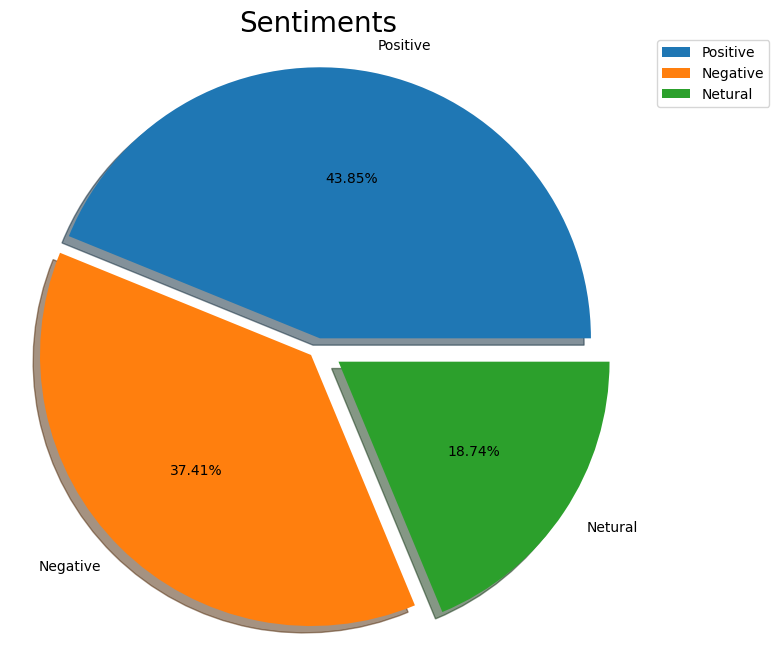

In [70]:
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

**We can see that the total number of "Positive" sentiments are still high after combining.**

In [71]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [72]:
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid19',",13286
1,"'coronavirus',",12972
2,"'prices',",7411
3,"'store',",6614
4,"'food',",6608
5,"'supermarket',",6405
6,"'grocery',",5794
7,"'people',",5030
8,"'amp',",4913
9,"'consumer',",4070


**Word such as 'Covid' and 'Coronavirus' are having large number of frequency  present in our dataset.**

**Word cloud**

In [73]:
neutral = pd.DataFrame(df[['stemmed','lemmed']] [df['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Positive'])
negative = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Negative'])

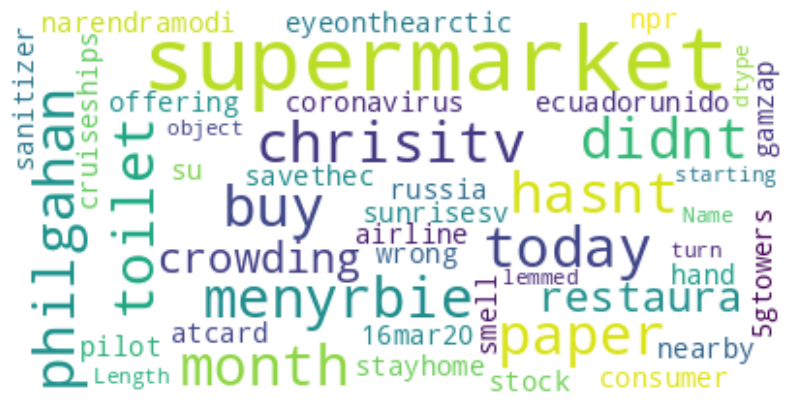

In [76]:
#word cloud for neutral sentiment
wc = WordCloud(background_color='white', contour_width=1,contour_color='steelblue')
wc.generate(str(neutral['lemmed']))
plt.figure(figsize=(10,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

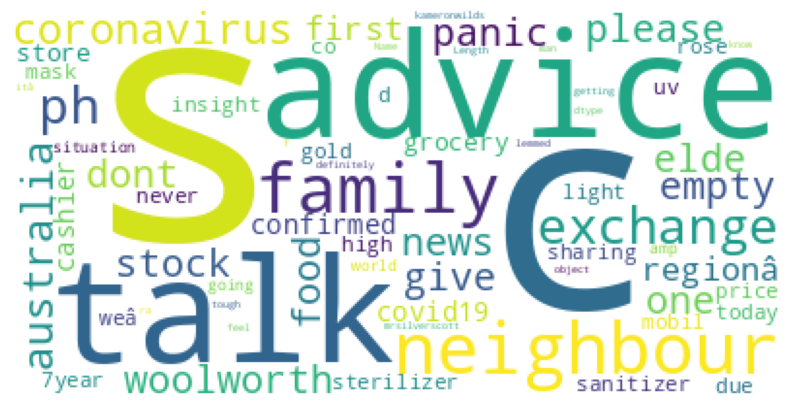

In [78]:
# word cloud for positive sentiments
wc.generate(str(positive['lemmed']))
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

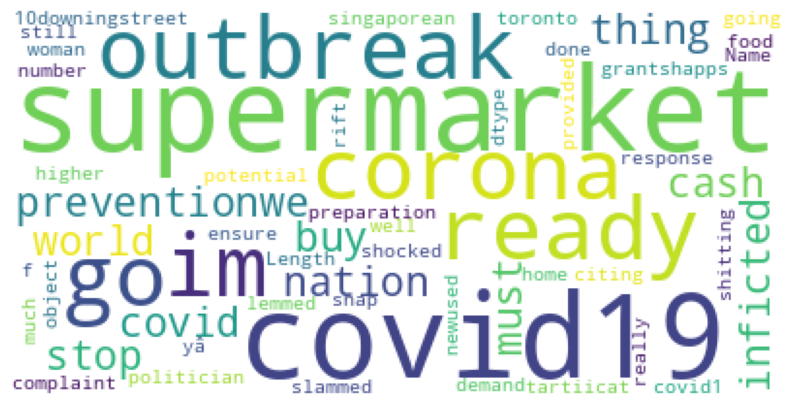

In [80]:
# word cloud for negative sentiments
wc.generate(str(negative['lemmed']))
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

**Train-Test Split**

In [81]:
X= df['lemmed']
y=df['Sentiment']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=10)

In [85]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(30867,)


(10290,)

In [86]:
#checking splitted data
print(X_train.head())
y_train.head()

3629     [food, supermarket, due, panic, buying, school...
29445    [know, two, easy, step, homemade, sanitizer, c...
28647    [difficult, slow, online, shopping, coronaviru...
6578     [prosecute, gobshites, lockdownuk, coronavirus...
12024    [long, fb, position, covid19, accelerating, ad...
Name: lemmed, dtype: object


3629     Negative
29445    Positive
28647    Negative
6578     Negative
12024    Positive
Name: Sentiment, dtype: object

 **Count Vectorization (Bag of words) and TF/IDF Vecorization**

In [87]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [88]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())


In [89]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [90]:
tv_X_train.shape

(30867, 18913)

In [91]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

 **Implementing Models (Bag of Words) by Vectoriser**

**1. Logistic Regression Count Vectoriser Method with Gridsearch CV**

In [92]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [93]:
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [94]:
pred_lr_cv

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [95]:
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7845481049562683


In [96]:
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      3850
     Neutral       0.68      0.69      0.69      1928
    Positive       0.82      0.83      0.82      4512

    accuracy                           0.78     10290
   macro avg       0.77      0.77      0.77     10290
weighted avg       0.78      0.78      0.78     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

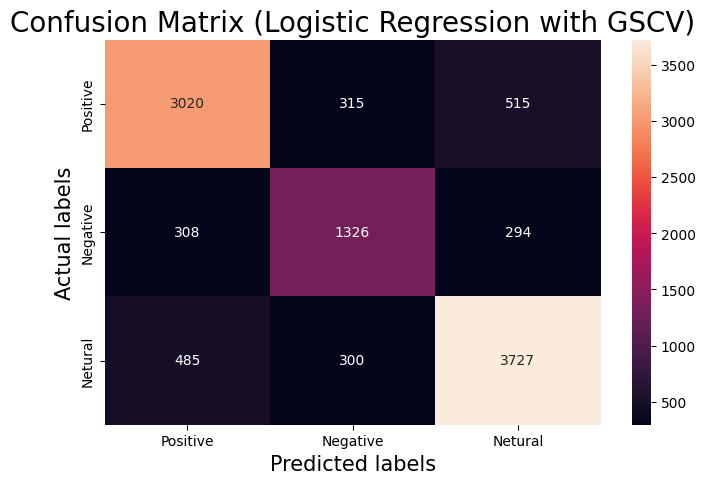

In [97]:
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with GSCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 78.45% which implies that our model is performing well.**

 **2. Decision Tree Classifier with CV**

In [98]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [99]:
pred_dt_cv

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Negative'], dtype=object)

In [100]:
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.6877897524518591


In [101]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.69      3850
     Neutral       0.62      0.67      0.64      1928
    Positive       0.75      0.73      0.74      4512

    accuracy                           0.70     10290
   macro avg       0.69      0.70      0.69     10290
weighted avg       0.70      0.70      0.70     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

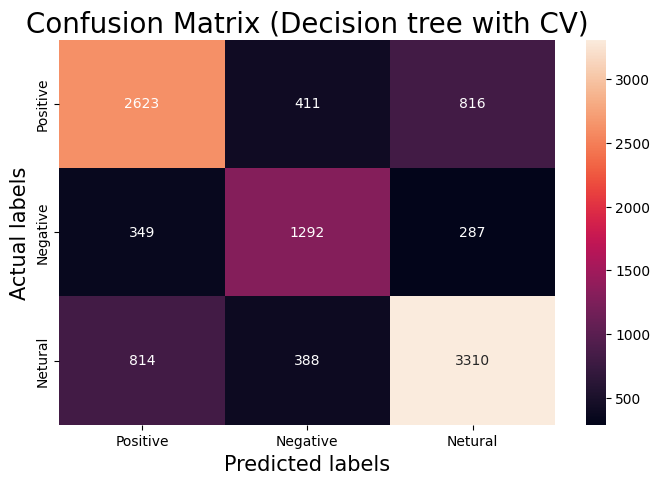

In [102]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 69.77% which implies that our model is performing well.**

**3. K-NN Count Vectorizer with GridsearchCV**

In [104]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(cv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [105]:
pred_knn_cv = knn_cv.predict(cv_X_test)


In [106]:
pred_knn_cv

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Negative',
       'Neutral'], dtype=object)

In [107]:
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.38328474246841593


In [108]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    Negative       0.62      0.29      0.39      3850
     Neutral       0.24      0.85      0.37      1928
    Positive       0.71      0.27      0.39      4512

    accuracy                           0.38     10290
   macro avg       0.52      0.47      0.38     10290
weighted avg       0.59      0.38      0.39     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

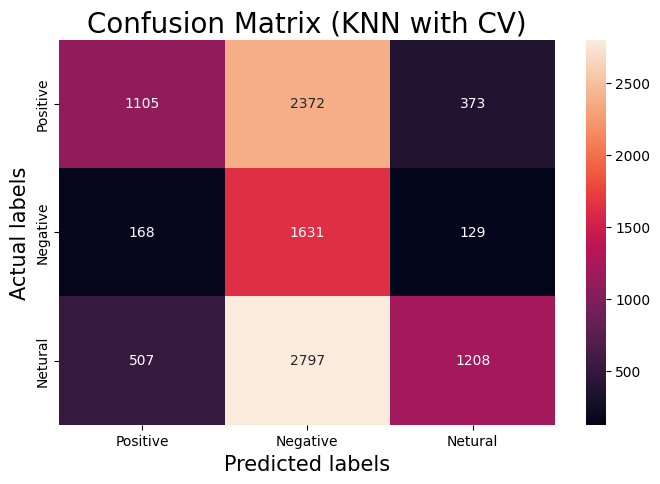

In [115]:
cf3= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**The model is giving an accuracy score of 38% which implies that our model is underperforming.**

4. **SVM with CV**

In [110]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [111]:
pred_svm_cv

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [112]:
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7613216715257531


In [113]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.75      0.76      3850
     Neutral       0.66      0.67      0.66      1928
    Positive       0.80      0.81      0.80      4512

    accuracy                           0.76     10290
   macro avg       0.74      0.74      0.74     10290
weighted avg       0.76      0.76      0.76     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

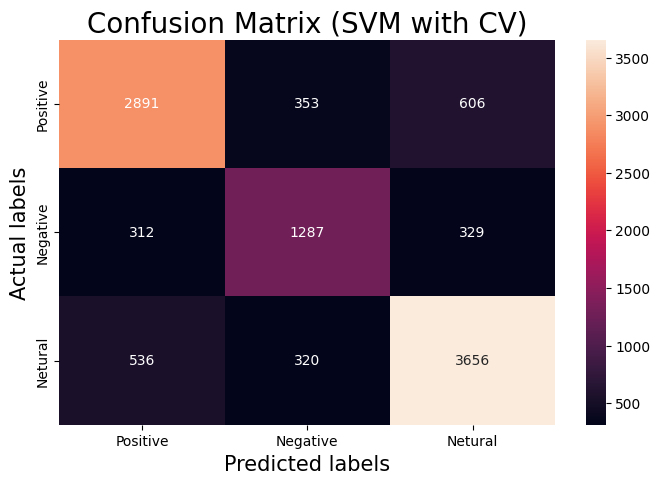

In [114]:
cf4= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 76% which implies that our model is performing well.**

**Implementing Models by TF/IDF Vectorizer**

**5**. **Logistic Regression TF/IDF vectorizer with GridsearchCV**

In [116]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [117]:
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
pred_lr_tv_Gcv

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [118]:
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7790087463556852


In [119]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.79      3850
     Neutral       0.68      0.64      0.66      1928
    Positive       0.82      0.83      0.82      4512

    accuracy                           0.78     10290
   macro avg       0.76      0.75      0.76     10290
weighted avg       0.78      0.78      0.78     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

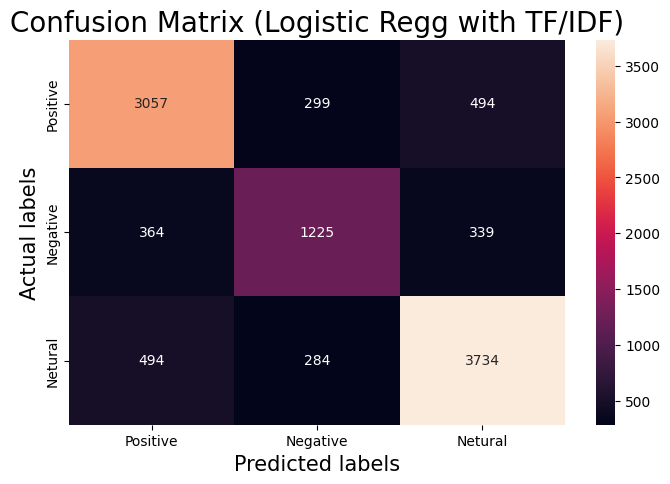

In [120]:
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 77% which implies that our model is performing well.**

**6. Decision tree classifier with TF/IDF**

In [121]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [122]:
pred_dt_tv

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [123]:
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6065049731447507


In [124]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.61      0.60      0.60      3850
     Neutral       0.48      0.55      0.51      1928
    Positive       0.69      0.66      0.67      4512

    accuracy                           0.61     10290
   macro avg       0.59      0.60      0.60     10290
weighted avg       0.62      0.61      0.62     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

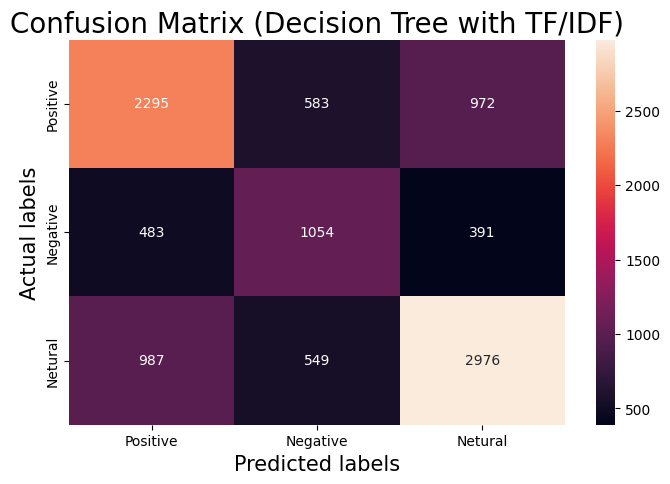

In [125]:
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)


ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 60% which implies that our model is performing well.**

 **7. KNN** **TF/ID with GridsearchCV**

In [126]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [127]:
pred_knn_tv = knn_cv.predict(tv_X_test)


In [128]:
pred_knn_tv

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [129]:
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))

Accuracy : 0.18746355685131194


In [130]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      3850
     Neutral       0.19      1.00      0.32      1928
    Positive       1.00      0.00      0.00      4512

    accuracy                           0.19     10290
   macro avg       0.40      0.33      0.11     10290
weighted avg       0.47      0.19      0.06     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

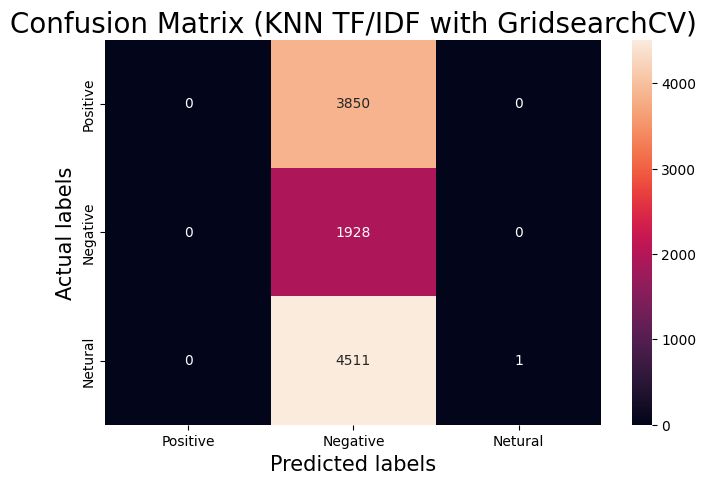

In [133]:
cf3a= (confusion_matrix(y_test,pred_knn_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 18% which implies that our model is underperforming.**

**8**. **SVM with TF/ID**

In [146]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [147]:
pred_svm_tv

array(['Negative', 'Positive', 'Negative', ..., 'Negative', 'Positive',
       'Positive'], dtype=object)

In [148]:
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv)
print("Accuracy :",(accuracy_svm_tv))

Accuracy : 0.763265306122449


In [149]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv))

              precision    recall  f1-score   support

    Negative       0.76      0.79      0.78      3850
     Neutral       0.72      0.53      0.61      1928
    Positive       0.78      0.84      0.81      4512

    accuracy                           0.76     10290
   macro avg       0.75      0.72      0.73     10290
weighted avg       0.76      0.76      0.76     10290



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

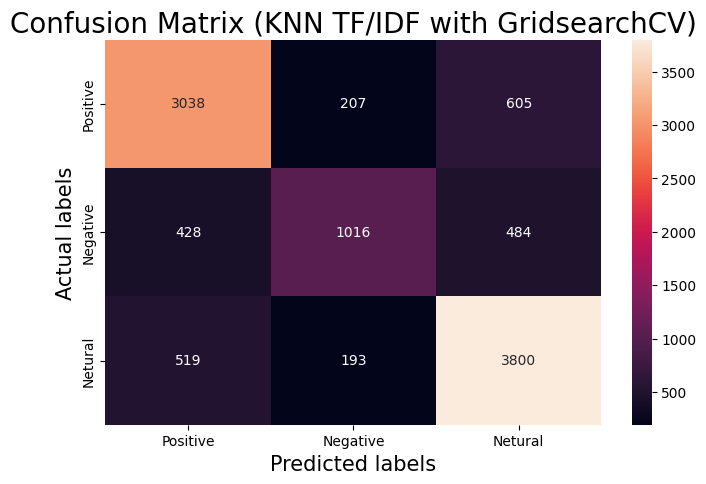

In [150]:
cf4a= (confusion_matrix(y_test,pred_svm_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**This model gives an accuracy score of 76% which implies that our model is performing well.**

In [151]:
acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv), accuracy_KNN,accuracy_svc],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv), accuracy_KNN_tv,accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

,Model,Count Vector,Tf/idf Vector
0,Logistic Regression with GridserachCV,0.784548,0.779009
1,Decision Tree Classifier,0.687790,0.606505
2,K-Nearest-Neighbours Classifier,0.383285,0.187464
3,Support-Vector-Machine Classifier,0.761322,0.763265


**Conclusions:**

1. We did Logistic Regression with Grid Search CV, Desision Tree Classifier, KNN, SVM Classifier for both Count Vector And TF IDF Vectorisation techniques.

2. Logistic Regression with Grid Search CV model with and Accuracy score of 78.45% and 77.90% respectively for Count vector and TF/idf Vector is generating the best results, followed by SVM
3. Also, we observed that no overfitting is seen for the data, and we can deploy this model.

